11501568/11490434 [==============================] - 0s 0us/step


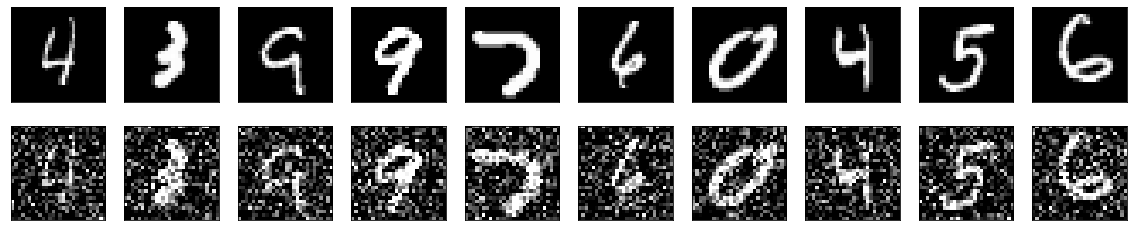

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 784)               50960     
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________
Model: "model_1"
______________________________________

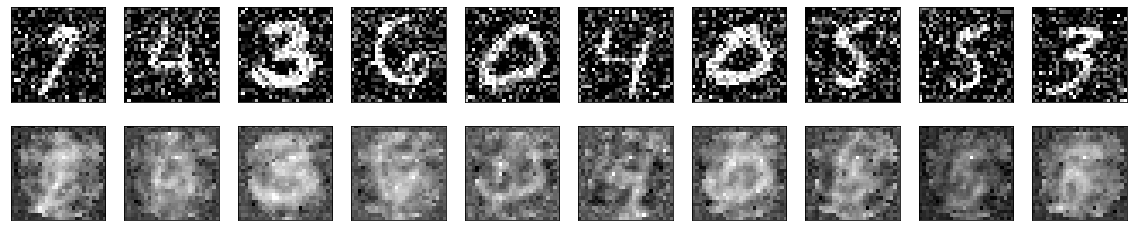

Epoch 1/15
469/469 [==============================] - 14s 9ms/step - loss: 0.1775 - val_loss: 0.1038
Epoch 2/15
469/469 [==============================] - 4s 9ms/step - loss: 0.1008 - val_loss: 0.0972
Epoch 3/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0964 - val_loss: 0.0941
Epoch 4/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0941 - val_loss: 0.0926
Epoch 5/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0926 - val_loss: 0.0913
Epoch 6/15
469/469 [==============================] - 4s 9ms/step - loss: 0.0914 - val_loss: 0.0901
Epoch 7/15
469/469 [==============================] - 4s 9ms/step - loss: 0.0905 - val_loss: 0.0893
Epoch 8/15
469/469 [==============================] - 4s 9ms/step - loss: 0.0897 - val_loss: 0.0889
Epoch 9/15
469/469 [==============================] - 4s 9ms/step - loss: 0.0891 - val_loss: 0.0882
Epoch 10/15
469/469 [==============================] - 4s 9ms/step - loss: 0.0886 - val_loss: 0.087

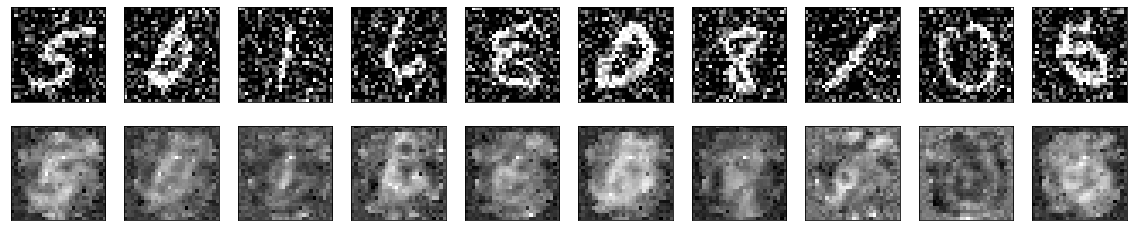

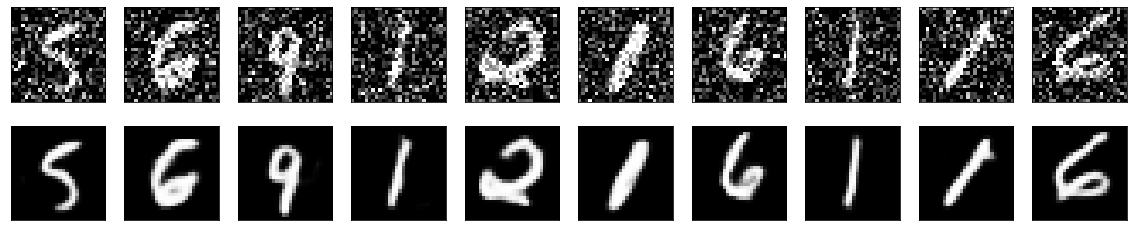

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Dense, Activation, Flatten, Reshape
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from keras.utils.vis_utils import plot_model

def preprocess(array):
    """
    Normalizes the supplied array and reshapes it into the appropriate format.
    """

    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array


def noise(array):
    """
    Adds random noise to each image in the supplied array.
    """

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)

def display(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()


# Since we only need images from the dataset to encode and decode, we
# won't use the labels.
(train_data, _), (test_data, _) = mnist.load_data()

# Normalize and reshape the data
train_data = preprocess(train_data)
test_data = preprocess(test_data)

# Create a copy of the data with added noise
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

# Display the train data and a version of it with added noise
display(train_data, noisy_train_data)

input = layers.Input(shape=(28, 28, 1))

# Encoder
x = Flatten()(input)
x = Dense(64)(x)
x = Dense(28*28*1)(x)
x = Reshape((28,28,1))(x)
# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()
plot_model(autoencoder, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

#Second model
input = layers.Input(shape=(28, 28, 1))
# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder

x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder2 = Model(input, x)
autoencoder2.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder2.summary()
plot_model(autoencoder2, to_file='model_plot2.png', show_shapes=True, show_layer_names=True)

autoencoder.fit(
    x=train_data,
    y=train_data,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(test_data, test_data),
)


predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)
'''
autoencoder.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=15,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
)
'''
autoencoder2.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=15,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
)

predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)

predictions2 = autoencoder2.predict(noisy_test_data)
display(noisy_test_data, predictions2)


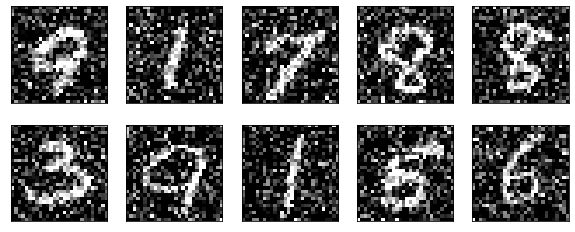

In [14]:
def display1(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(10, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, 5, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)


    plt.show()
display1(noisy_train_data, noisy_train_data)